# Online Sales Data Set Analysis in India Using Python and Pandas


#### Project Objective:"This project aims to clean and analyse an online sales dataset containing transaction‑level information such as products, quantities, prices, discounts, shipping costs and customer details across multiple countries and years. The goal is to engineer revenue and profit metrics, explore sales performance by product category, sales channel and geography, and generate insights that can support data‑driven decisions to improve pricing, discounting and channel strategy.”


In [97]:
# Import core data analysis libraries for working with tables and 
#numerical operations
import pandas as pd
import numpy as np


In [98]:
# Load the raw online sales dataset from CSV into a pandas DataFrame
df=pd.read_csv('ONLINE_SALES_DATA.csv')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,1/1/2020 0:00,1.71,37039.0,Australia,0.470000,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,1/1/2020 1:00,41.25,19144.0,Spain,0.190000,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,1/1/2020 2:00,29.11,50472.0,Germany,0.350000,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,1/1/2020 3:00,76.68,96586.0,Netherlands,0.140000,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
4,359178,SKU_1386,USB Cable,-30,1/1/2020 4:00,-68.11,NaN,United Kingdom,1.501433,Bank Transfer,NaN,Electronics,In-store,Not Returned,FedEx,NaN,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,408067,SKU_1851,USB Cable,28,1/4/2025 23:00,54.88,54591.0,Netherlands,0.300000,Bank Transfer,22.48,Accessories,In-store,Not Returned,Royal Mail,Rome,Low
595,397224,SKU_1660,Backpack,20,1/5/2025 0:00,68.57,25591.0,Norway,0.260000,Credit Card,16.53,Stationery,Online,Not Returned,FedEx,Amsterdam,High
596,103474,SKU_1796,Office Chair,5,1/5/2025 1:00,95.89,13836.0,Spain,0.140000,Credit Card,23.54,Furniture,In-store,Not Returned,FedEx,Paris,High
597,225185,SKU_1106,Office Chair,35,1/5/2025 2:00,7.26,NaN,Italy,0.360000,paypall,5.12,Electronics,In-store,Not Returned,FedEx,Amsterdam,Medium


In [99]:
# Check the overall shape of the dataset (number of rows and columns)
df.shape

(599, 17)

In [100]:
# View basic descriptive statistics for numeric columns like Quantity,
#UnitPrice, Discount and ShippingCost
df.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID,Discount,ShippingCost
count,599.000000,599.000000,599.000000,540.000000,599.000000,571.000000
mean,547111.515860,23.090150,48.096311,55363.216667,0.264964,17.195184
std,256460.577059,18.138409,32.570352,26702.605538,0.229129,7.378582
min,100654.000000,-50.000000,-95.370000,10387.000000,0.000000,5.010000
25%,323112.000000,12.000000,25.575000,31541.000000,0.120000,10.665000
50%,545581.000000,25.000000,48.460000,54969.000000,0.250000,16.800000
75%,773094.000000,37.000000,73.785000,79397.000000,0.370000,23.570000
max,999159.000000,49.000000,99.870000,99791.000000,1.919174,29.970000


In [101]:
# List all column names to understand available fields in the online sales data
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Discount', 'PaymentMethod',
       'ShippingCost', 'Category', 'SalesChannel', 'ReturnStatus',
       'ShipmentProvider', 'WarehouseLocation', 'OrderPriority'],
      dtype='object')

In [102]:
#This shows the datatype of each headercolumn
df.dtypes

InvoiceNo              int64
StockCode             object
Description           object
Quantity               int64
InvoiceDate           object
UnitPrice            float64
CustomerID           float64
Country               object
Discount             float64
PaymentMethod         object
ShippingCost         float64
Category              object
SalesChannel          object
ReturnStatus          object
ShipmentProvider      object
WarehouseLocation     object
OrderPriority         object
dtype: object

In [103]:
# Check how many missing values exist in each column to plan cleaning strategy
df.isnull().sum()

InvoiceNo             0
StockCode             0
Description           0
Quantity              0
InvoiceDate           0
UnitPrice             0
CustomerID           59
Country               0
Discount              0
PaymentMethod         0
ShippingCost         28
Category              0
SalesChannel          0
ReturnStatus          0
ShipmentProvider      0
WarehouseLocation    42
OrderPriority         0
dtype: int64

In [104]:
# Check sum of  duplicate values exist in each column 
df.duplicated().sum()

np.int64(0)

In [105]:
# Convert InvoiceDate from string to datetime format for proper 
#time-based analysis

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']).dt.date


In [106]:
#This code selects key categorical columns and applies the same 
#text‑cleaning steps to all of them.It converts values to strings, 
#strips extra spaces, and converts them to title case so categories
#are stored in a consistent, analysis‑ready format.

cat_cols = ['InvoiceNo','StockCode','Country','Description','PaymentMethod', 'SalesChannel', 'ReturnStatus', 
            'ShipmentProvider', 'WarehouseLocation', 'OrderPriority', 'Category']
df[cat_cols] = df[cat_cols].apply(lambda s: s.astype(str).str.strip().str.title())


In [107]:
# Fill missing ShippingCost with the median shipping cost to avoid 
#losing rows while keeping realistic values

df['ShippingCost']=df['ShippingCost'].fillna(df['ShippingCost'].median())

In [108]:
# Fill missing WarehouseLocation with Unknown for missing entries

df['WarehouseLocation']=df['WarehouseLocation'].fillna('Unknown')

In [109]:
# Optionally fill missing CustomerID with a placeholder or
#keep as NaN depending on analysis needs

df['CustomerID']=df['CustomerID'].replace('nan',pd.NA)

In [110]:
# Convert CustomerID from string to numeric format for proper analysis

df['CustomerID']=pd.to_numeric(df['CustomerID'],errors='coerce')

In [111]:
# Drop rows where  CustomerID are missing, since those records
#are not reliable for analysis

df=df.dropna(subset=['CustomerID']).copy()

In [112]:
#Rename the column name Description to Product Name

df = df.rename(columns={"Description": "ProductName"})

In [113]:
df

,InvoiceNo,StockCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,Sku_1964,White Mug,38,2020-01-01,1.71,37039.0,Australia,0.47,Bank Transfer,10.79,Apparel,In-Store,Not Returned,Ups,London,Medium
1,771155,Sku_1241,White Mug,18,2020-01-01,41.25,19144.0,Spain,0.19,Paypall,9.51,Electronics,Online,Not Returned,Ups,Rome,Medium
2,231932,Sku_1501,Headphones,49,2020-01-01,29.11,50472.0,Germany,0.35,Bank Transfer,23.03,Electronics,Online,Returned,Ups,Berlin,High
3,465838,Sku_1760,Desk Lamp,14,2020-01-01,76.68,96586.0,Netherlands,0.14,Paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
5,744167,Sku_1006,Office Chair,47,2020-01-01,70.16,53887.0,Sweden,0.48,Credit Card,13.98,Electronics,Online,Not Returned,Dhl,London,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,490262,Sku_1869,White Mug,32,2025-01-04,50.16,23776.0,Germany,0.33,Paypall,24.95,Furniture,In-Store,Not Returned,Fedex,Amsterdam,High
594,408067,Sku_1851,Usb Cable,28,2025-01-04,54.88,54591.0,Netherlands,0.30,Bank Transfer,22.48,Accessories,In-Store,Not Returned,Royal Mail,Rome,Low
595,397224,Sku_1660,Backpack,20,2025-01-05,68.57,25591.0,Norway,0.26,Credit Card,16.53,Stationery,Online,Not Returned,Fedex,Amsterdam,High
596,103474,Sku_1796,Office Chair,5,2025-01-05,95.89,13836.0,Spain,0.14,Credit Card,23.54,Furniture,In-Store,Not Returned,Fedex,Paris,High


In [114]:
# List all column names to understand available fields in the online sales data

df.columns

Index(['InvoiceNo', 'StockCode', 'ProductName', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Discount', 'PaymentMethod',
       'ShippingCost', 'Category', 'SalesChannel', 'ReturnStatus',
       'ShipmentProvider', 'WarehouseLocation', 'OrderPriority'],
      dtype='object')

In [115]:
#rounds the Discount values to two decimal places 

df['Discount'] = df['Discount'].round(2)

In [116]:
#replaces all UnitPrice values with their absolute values, 
#turning any negative prices into positive ones.

df['UnitPrice'] = df['UnitPrice'].abs()


In [117]:
#replaces all Quantity values with their absolute values, 
#turning any negative prices into positive ones.

df['Quantity'] = df['Quantity'].abs()


In [118]:
#Compute total price per line item as Quantity multiplied by UnitPrice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']                   

#Calculate the absolute discount amount based on discount rate and total price
df['DiscountAmount'] = df['TotalPrice'] * df['Discount']                

#Calculate price after discount, before adding shipping
df['PriceAfterDiscount'] = df['TotalPrice'] - df['DiscountAmount']     

# Treat FinalPrice as Revenue for each transaction line
df['Revenue']=df['PriceAfterDiscount']+df['ShippingCost']               


In [119]:
# assume cost is 60% of UnitPrice 
df['EstimatedCost'] = df['Quantity'] * (df['UnitPrice'] * 0.60)       

# Compute profit as revenue minus estimated cost
df['Profit'] = df['Revenue'] - df['EstimatedCost']       

# Calculate profit margin as profit divided by revenue
df['ProfitMargin'] = ((df['Profit'] / df['Revenue']) * 100).round(2)

In [120]:
df

,InvoiceNo,StockCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,...,ShipmentProvider,WarehouseLocation,OrderPriority,TotalPrice,DiscountAmount,PriceAfterDiscount,Revenue,EstimatedCost,Profit,ProfitMargin
0,221958,Sku_1964,White Mug,38,2020-01-01,1.71,37039.0,Australia,0.47,Bank Transfer,...,Ups,London,Medium,64.98,30.5406,34.4394,45.2294,38.988,6.2414,13.80
1,771155,Sku_1241,White Mug,18,2020-01-01,41.25,19144.0,Spain,0.19,Paypall,...,Ups,Rome,Medium,742.50,141.0750,601.4250,610.9350,445.500,165.4350,27.08
2,231932,Sku_1501,Headphones,49,2020-01-01,29.11,50472.0,Germany,0.35,Bank Transfer,...,Ups,Berlin,High,1426.39,499.2365,927.1535,950.1835,855.834,94.3495,9.93
3,465838,Sku_1760,Desk Lamp,14,2020-01-01,76.68,96586.0,Netherlands,0.14,Paypall,...,Royal Mail,Rome,Low,1073.52,150.2928,923.2272,934.3072,644.112,290.1952,31.06
5,744167,Sku_1006,Office Chair,47,2020-01-01,70.16,53887.0,Sweden,0.48,Credit Card,...,Dhl,London,Medium,3297.52,1582.8096,1714.7104,1728.6904,1978.512,-249.8216,-14.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,490262,Sku_1869,White Mug,32,2025-01-04,50.16,23776.0,Germany,0.33,Paypall,...,Fedex,Amsterdam,High,1605.12,529.6896,1075.4304,1100.3804,963.072,137.3084,12.48
594,408067,Sku_1851,Usb Cable,28,2025-01-04,54.88,54591.0,Netherlands,0.30,Bank Transfer,...,Royal Mail,Rome,Low,1536.64,460.9920,1075.6480,1098.1280,921.984,176.1440,16.04
595,397224,Sku_1660,Backpack,20,2025-01-05,68.57,25591.0,Norway,0.26,Credit Card,...,Fedex,Amsterdam,High,1371.40,356.5640,1014.8360,1031.3660,822.840,208.5260,20.22
596,103474,Sku_1796,Office Chair,5,2025-01-05,95.89,13836.0,Spain,0.14,Credit Card,...,Fedex,Paris,High,479.45,67.1230,412.3270,435.8670,287.670,148.1970,34.00


In [121]:
# Verify the new metric columns and data types after feature engineering
df[['TotalPrice','DiscountAmount','PriceAfterDiscount','Revenue','EstimatedCost',
    'Profit','ProfitMargin']].head()


,TotalPrice,DiscountAmount,PriceAfterDiscount,Revenue,EstimatedCost,Profit,ProfitMargin
0,64.98,30.5406,34.4394,45.2294,38.988,6.2414,13.80
1,742.50,141.0750,601.4250,610.9350,445.500,165.4350,27.08
2,1426.39,499.2365,927.1535,950.1835,855.834,94.3495,9.93
3,1073.52,150.2928,923.2272,934.3072,644.112,290.1952,31.06
5,3297.52,1582.8096,1714.7104,1728.6904,1978.512,-249.8216,-14.45


In [122]:
# Get summary statistics for the new revenue and profit-related columns
df[['TotalPrice', 'Revenue', 'Profit', 'ProfitMargin']].describe()


,TotalPrice,Revenue,Profit,ProfitMargin
count,540.000000,540.000000,540.000000,540.000000
mean,1274.530630,990.247178,225.528800,23.356167
std,1078.405943,875.186972,313.413346,17.712207
min,1.680000,12.072800,-324.916000,-19.400000
25%,417.855000,313.341900,27.661000,11.072500
50%,997.995000,729.673550,115.671800,26.385000
75%,1959.495000,1439.697700,306.118500,36.500000
max,4631.520000,4183.450000,1637.938000,91.650000


In [123]:
# mapping from product name to Category
product_to_cat = {
    "White Mug":      "Home & Kitchen", 
    "Headphones":     "Electronics",
    "Desk Lamp":      "Furniture",
    "USB Cable":      "Electronics",
    "Office Chair":   "Furniture",
    "Notebook":       "Stationery",
    "Wireless Mouse": "Electronics",
    "Blue Pen":       "Stationery",
    "Wall Clock":     "Home Decor",
    "T-shirt":        "Apparel",
    "Backpack":       "Accessories",
}

# update Category column based on product name
df["Category"] = df["ProductName"].map(product_to_cat).fillna(df["Category"])


In [124]:
df[['Category','ProductName']]

,Category,ProductName
0,Home & Kitchen,White Mug
1,Home & Kitchen,White Mug
2,Electronics,Headphones
3,Furniture,Desk Lamp
5,Furniture,Office Chair
...,...,...
592,Home & Kitchen,White Mug
594,Accessories,Usb Cable
595,Accessories,Backpack
596,Furniture,Office Chair


In [125]:
#counts the frequency of each unique category in the Category column
df["Category"].value_counts()  

Category
Electronics       125
Furniture         121
Stationery        115
Accessories        64
Home Decor         54
Home & Kitchen     45
Apparel            16
Name: count, dtype: int64

In [126]:
#counts the frequency of each unique country in the Country column
df["Country"].value_counts()

Country
Australia         58
Norway            52
United Kingdom    52
Netherlands       50
Spain             47
Italy             45
Sweden            43
United States     42
Germany           41
Belgium           38
Portugal          37
France            35
Name: count, dtype: int64

In [127]:
## Extract additional time features such as year trend analysis

df["InvoiceYear"] = pd.to_datetime(df["InvoiceDate"]).dt.year

In [128]:
df["InvoiceYear"]

0      2020
1      2020
2      2020
3      2020
5      2020
       ... 
592    2025
594    2025
595    2025
596    2025
598    2025
Name: InvoiceYear, Length: 540, dtype: int32

In [129]:
#It calculates total quantity sold for each product in each year 
#and then sorts the result by year and quantity.
year_product_sales = (
    df.groupby(["InvoiceYear", "ProductName"])["Quantity"]
      .sum()
      .reset_index()
      .sort_values(["InvoiceYear", "Quantity"], ascending=[True, False])
)
print(year_product_sales.head(20))

    InvoiceYear     ProductName  Quantity
6          2020         T-Shirt       279
9          2020       White Mug       278
5          2020    Office Chair       266
10         2020  Wireless Mouse       257
1          2020        Blue Pen       238
3          2020      Headphones       227
8          2020      Wall Clock       223
7          2020       Usb Cable       209
0          2020        Backpack       202
4          2020        Notebook       174
2          2020       Desk Lamp        73
21         2021  Wireless Mouse       453
14         2021      Headphones       324
17         2021         T-Shirt       292
13         2021       Desk Lamp       291
18         2021       Usb Cable       249
16         2021    Office Chair       232
19         2021      Wall Clock       204
15         2021        Notebook       187
20         2021       White Mug       158


In [130]:
#It calculates total quantity sold for  each year 
#and then sorts the result by year
Yearly_Sales = (
    df.groupby("InvoiceYear")["Quantity"]
      .sum()
      .reset_index()
      .sort_values("InvoiceYear")
)
print(Yearly_Sales.head(10))

   InvoiceYear  Quantity
0         2020      2426
1         2021      2500
2         2022      2033
3         2023      2225
4         2024      2382
5         2025      2138


In [131]:
# profit by country
#Calculates total profit for each country and sorts by highest profit
profit_country = (
    df.groupby('Country')['Profit']
      .sum()
      .reset_index()
      .sort_values('Profit', ascending=False)
)

# quantity by sales channel (Online vs In-store)
#Calculates total revenue for Online and In-store sales channels
rev_channel = (
    df.groupby('SalesChannel')['Revenue']
      .sum()
      .reset_index()
      .sort_values('Revenue', ascending=False)
)

# top 10 best-selling products based on total revenue and quantity sold
top_products = (
    df.groupby('ProductName')
      .agg(TotalQty=('Quantity', 'sum'),
           Revenue=('Revenue', 'sum'))
      .reset_index()
      .sort_values('Revenue', ascending=False)
      .head(10)
)


In [132]:
# total revenue
total_revenue = df['Revenue'].sum()

# total orders
total_orders = df['InvoiceNo'].nunique()

# total customers
total_customers = df['CustomerID'].nunique()

# average order value
aov = df.groupby('InvoiceNo')['Revenue'].sum().mean()


In [133]:
# It calculates total revenue for  each year and then sorts the result by year
yearly_sales = (
    df.groupby('InvoiceYear')['Revenue']
      .sum()
      .reset_index()
      .sort_values('InvoiceYear')
)

# revenue per customer
cust_value = (
    df.groupby('CustomerID')['Revenue']
      .sum()
      .reset_index()
      .sort_values('Revenue', ascending=False)
)


In [134]:
# top 10 countries based on revenue
top_countries = (
    df.groupby('Country')['Revenue']
      .sum()
      .reset_index()
      .sort_values('Revenue', ascending=False)
)

print(top_countries.head(10))


           Country     Revenue
10  United Kingdom  64416.1002
4            Italy  50663.6296
9           Sweden  50184.1849
3          Germany  50103.1155
6           Norway  49053.5781
0        Australia  47462.4695
5      Netherlands  46935.7203
8            Spain  40895.2670
11   United States  38319.9452
7         Portugal  38182.3837


In [135]:
# calculates total profit per year
yearly_profit = (
    df.groupby('InvoiceYear')['Profit']
      .sum()
      .reset_index()
      .sort_values('InvoiceYear')
)

print(yearly_profit)




   InvoiceYear      Profit
0         2020  20761.6269
1         2021  28822.7318
2         2022  21685.7352
3         2023  14038.3758
4         2024  16926.4709
5         2025  19550.6116


In [136]:
# "Top products by revenue and quantity"
prod_perf = (
    df.groupby('ProductName')
      .agg(TotalQty=('Quantity', 'sum'),
           TotalRevenue=('Revenue', 'sum'),
           AvgPrice=('UnitPrice', 'mean'))
      .reset_index()
      .sort_values('TotalRevenue', ascending=False)
      .head(10)
)


In [137]:
# "Category-level performance based on total quantity and revenue" 
cat_perf = (
    df.groupby('Category')
      .agg(TotalQty=('Quantity', 'sum'),
           TotalRevenue=('Revenue', 'sum'),
           AvgDiscount=('Discount', 'mean'))
      .reset_index()
      .sort_values('TotalRevenue', ascending=False)
)


In [138]:
# Online vs In-store performance based on revenue
channel_perf = (
    df.groupby('SalesChannel')
      .agg(TotalRevenue=('Revenue', 'sum'),
           Orders=('InvoiceNo', 'nunique'),
           AvgOrderValue=('Revenue', 'mean'))
      .reset_index()
)

# Payment method usage and revenue
pay_perf = (
    df.groupby('PaymentMethod')
      .agg(TotalRevenue=('Revenue', 'sum'),
           Orders=('InvoiceNo', 'nunique'))
      .reset_index()
      .sort_values('TotalRevenue', ascending=False)
)

# Return rate by category
return_rate_cat = (
    df.assign(IsReturned=(df['ReturnStatus'] == 'Returned'))
      .groupby('Category')
      .agg(ReturnRate=('IsReturned', 'mean'),
           Revenue=('Revenue', 'sum'))
      .reset_index()
)


In [139]:
df

,InvoiceNo,StockCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,...,WarehouseLocation,OrderPriority,TotalPrice,DiscountAmount,PriceAfterDiscount,Revenue,EstimatedCost,Profit,ProfitMargin,InvoiceYear
0,221958,Sku_1964,White Mug,38,2020-01-01,1.71,37039.0,Australia,0.47,Bank Transfer,...,London,Medium,64.98,30.5406,34.4394,45.2294,38.988,6.2414,13.80,2020
1,771155,Sku_1241,White Mug,18,2020-01-01,41.25,19144.0,Spain,0.19,Paypall,...,Rome,Medium,742.50,141.0750,601.4250,610.9350,445.500,165.4350,27.08,2020
2,231932,Sku_1501,Headphones,49,2020-01-01,29.11,50472.0,Germany,0.35,Bank Transfer,...,Berlin,High,1426.39,499.2365,927.1535,950.1835,855.834,94.3495,9.93,2020
3,465838,Sku_1760,Desk Lamp,14,2020-01-01,76.68,96586.0,Netherlands,0.14,Paypall,...,Rome,Low,1073.52,150.2928,923.2272,934.3072,644.112,290.1952,31.06,2020
5,744167,Sku_1006,Office Chair,47,2020-01-01,70.16,53887.0,Sweden,0.48,Credit Card,...,London,Medium,3297.52,1582.8096,1714.7104,1728.6904,1978.512,-249.8216,-14.45,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,490262,Sku_1869,White Mug,32,2025-01-04,50.16,23776.0,Germany,0.33,Paypall,...,Amsterdam,High,1605.12,529.6896,1075.4304,1100.3804,963.072,137.3084,12.48,2025
594,408067,Sku_1851,Usb Cable,28,2025-01-04,54.88,54591.0,Netherlands,0.30,Bank Transfer,...,Rome,Low,1536.64,460.9920,1075.6480,1098.1280,921.984,176.1440,16.04,2025
595,397224,Sku_1660,Backpack,20,2025-01-05,68.57,25591.0,Norway,0.26,Credit Card,...,Amsterdam,High,1371.40,356.5640,1014.8360,1031.3660,822.840,208.5260,20.22,2025
596,103474,Sku_1796,Office Chair,5,2025-01-05,95.89,13836.0,Spain,0.14,Credit Card,...,Paris,High,479.45,67.1230,412.3270,435.8670,287.670,148.1970,34.00,2025


In [140]:
df.to_csv('cleaned_onlinesales_data.csv',index=False)

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

## "Net Revenue by Country":

The below bar plot displays net revenue by country, with the UK leading followed
by a middle tier (Italy, Sweden, Germany, Norway, Australia, Netherlands).
Spain, US, and Portugal show moderate revenue, while France and Belgium the least. 
This highlights the UK's top performance and regional revenue gaps.

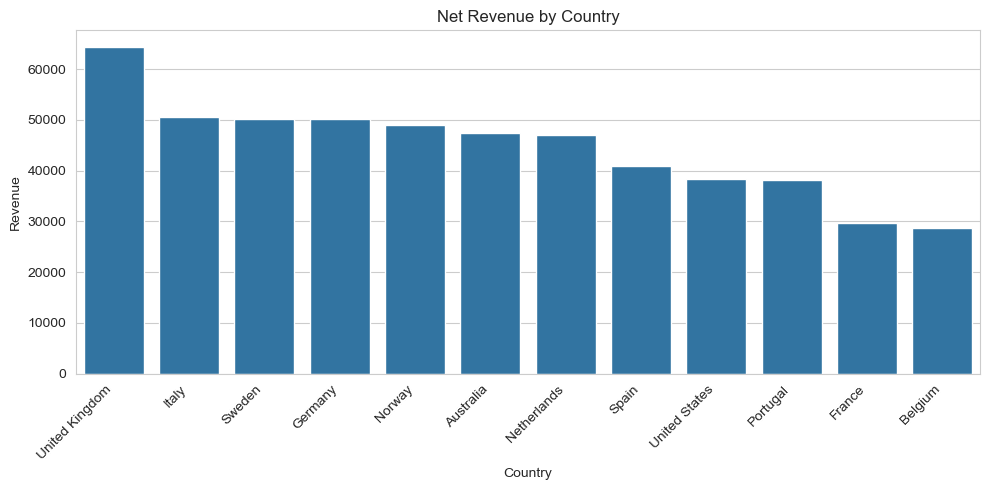

In [143]:
plt.figure(figsize=(10,5))                                   
sns.barplot(data=top_countries, x='Country', y='Revenue')
plt.xticks(rotation=45, ha='right')
plt.title('Net Revenue by Country')
plt.tight_layout()
plt.show()

## "Profit by Year":

The bar plot shows profit by invoice year from 2020 to 2025.
Profit peaks in 2021 at around 28,500,following a steady rise from 2020(20,500).
It declines in 2022 and reaches a low in 2023 (14,000).
Profits then recover in 2024 and 2025, indicating a positive upward trend.

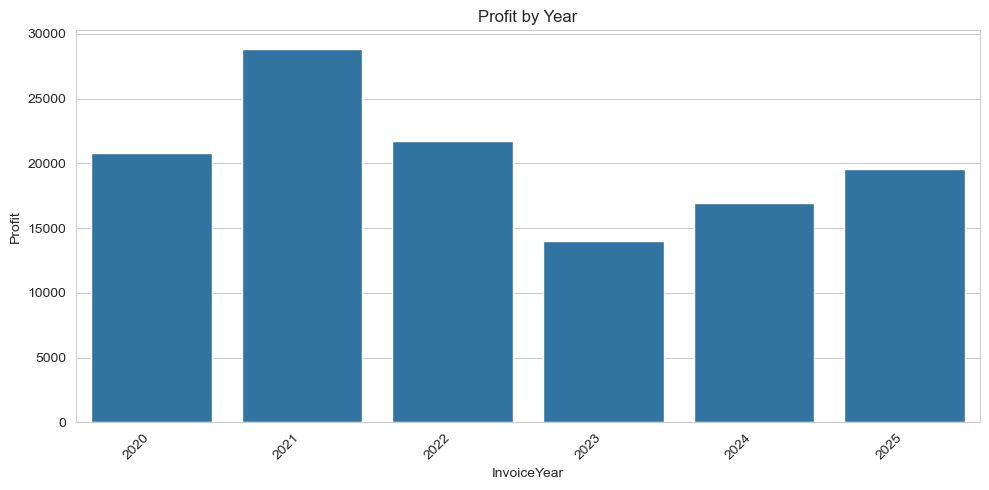

In [145]:
plt.figure(figsize=(10,5))
sns.barplot(data=yearly_profit, x='InvoiceYear', y='Profit')
plt.xticks(rotation=45, ha='right')
plt.title('Profit by Year')
plt.tight_layout()
plt.show()

## "Category-wise Quantity Share":

The pie chart shows the category-wise share of total quantity sold.
Electronics(22.5%),Furniture(22.1%),and Stationery(21.9%)contribute the largest shares.
Accessories,Home Decor,and Home&Kitchen each account for around 10% of total quantity.
Apparel has the smallest share at approximately 2.7%.


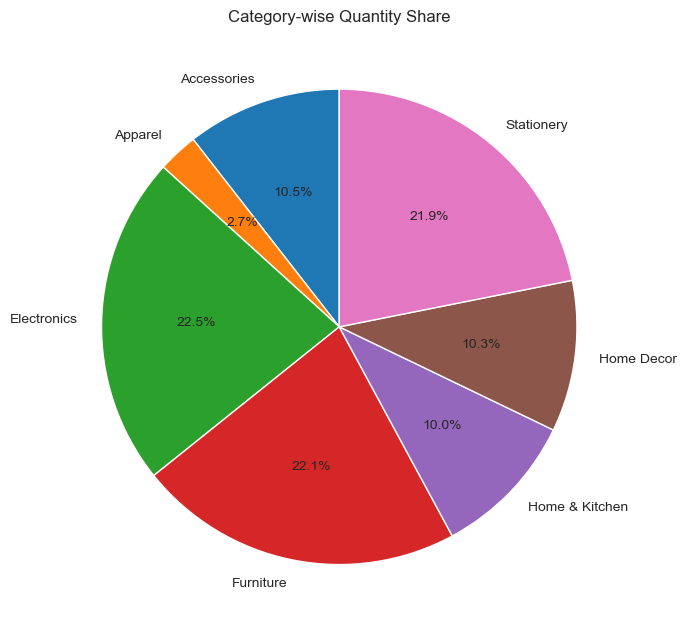

In [147]:
import matplotlib.pyplot as plt

cat_qty = (
    df.groupby('Category')['Quantity']
      .sum()
      .reset_index()
)

plt.figure(figsize=(7,7))
plt.pie(
    cat_qty['Quantity'],
    labels=cat_qty['Category'],
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Category-wise Quantity Share')
plt.tight_layout()
plt.show()



## "Quantity per Line Distribution":

The histogram shows the distribution of quantity per line item from 1 to 50.
Quantities are fairly evenly distributed, with slightly higher 
frequencies between 20 and 35.
Very low (1–5) and very high (45–50) quantities appear less frequently.
This indicates that most orders contain moderate line-item quantities.



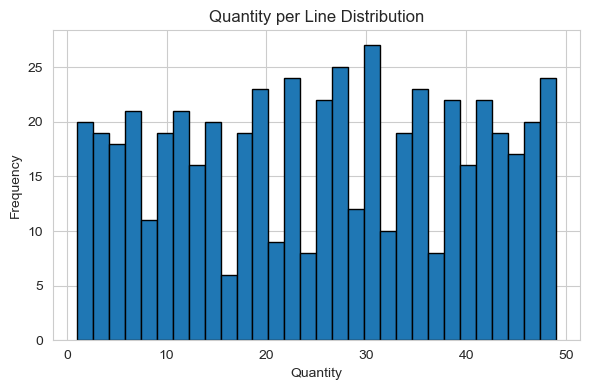

In [149]:
plt.figure(figsize=(6,4))
plt.hist(df['Quantity'], bins=30, edgecolor='black')
plt.title('Quantity per Line Distribution')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



## "Discount Distribution":

The histogram shows discount rate distribution across transactions,
with most clustered at low rates (0.1-0.3) peaking around 25-30 frequencies. 
Higher discounts (0.4-0.5) occur less frequently but still notable, 
indicating varied pricing strategies. Overall, low discounts dominate the dataset.


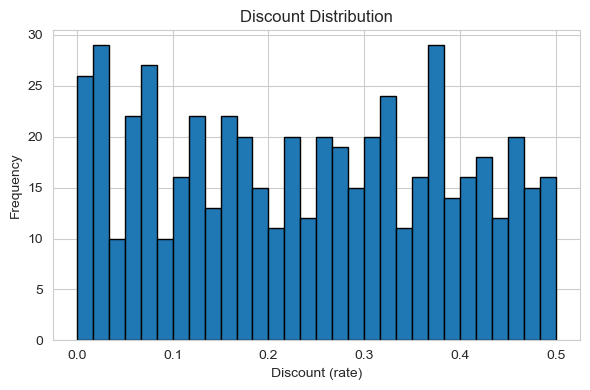

In [151]:
plt.figure(figsize=(6,4))
plt.hist(df['Discount'], bins=30, edgecolor='black')
plt.title('Discount Distribution')
plt.xlabel('Discount (rate)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## 'Shipping Cost Distribution':

The histogram depicts shipping cost distribution, with most costs clustered
between 5-20 units and peak frequencies around 15-25. 
Higher costs (20-30) occur less often but remain notable,
showing varied shipping expenses across orders.
Low-cost shipments dominate the dataset overall.


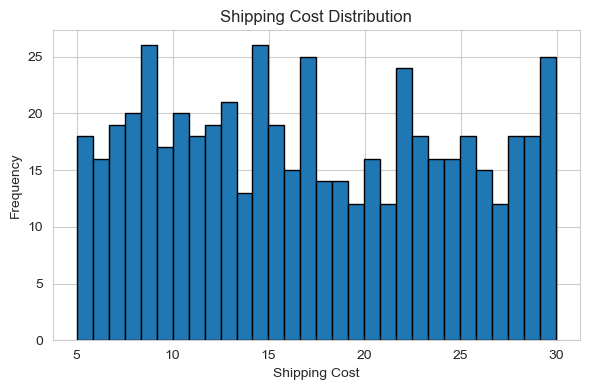

In [153]:
plt.figure(figsize=(6,4))
plt.hist(df['ShippingCost'], bins=30, edgecolor='black')
plt.title('Shipping Cost Distribution')
plt.xlabel('Shipping Cost')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## "Discount vs Revenue Scatter plot":

The scatter plot examines the relationship between discount 
rate (x-axis, 0-0.5) and revenue (y-axis, 0-4000),
revealing no clear correlation as points spread widely across 
all discount levels.Higher discounts do not consistently reduce revenue,
with substantial revenue generated even at 0.4-0.5 rates.This suggests discounts
may effectively drive sales volume without harming overall revenue.


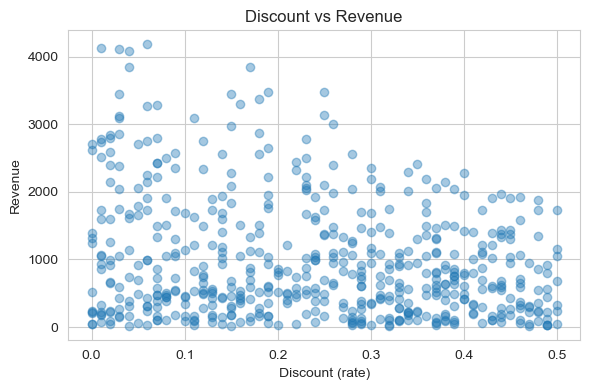

In [155]:
plt.figure(figsize=(6,4))
plt.scatter(df['Discount'], df['Revenue'], alpha=0.4)
plt.xlabel('Discount (rate)')
plt.ylabel('Revenue')
plt.title('Discount vs Revenue')
plt.tight_layout()
plt.show()


## "Discount vs Quantity Scatter plot":

The scatter plot shows discount rate(x-axis, 0-0.5) versus quantity(y-axis, 0-50),
with points scattered broadly and no strong linear correlation. Higher discounts
appear across various quantities without consistently driving larger orders. 
This indicates discounts may not significantly boost per-line item volumes
in this dataset.


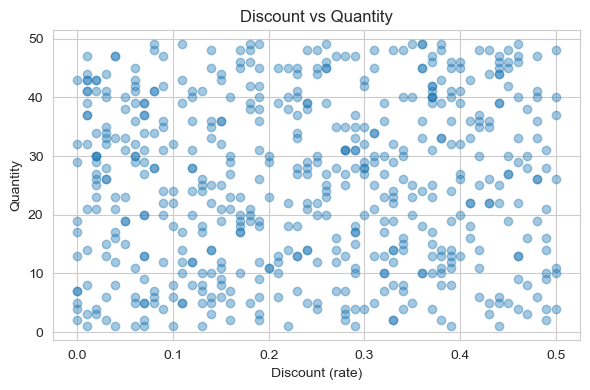

In [157]:


plt.figure(figsize=(6,4))
plt.scatter(df['Discount'], df['Quantity'], alpha=0.4)
plt.xlabel('Discount (rate)')
plt.ylabel('Quantity')
plt.title('Discount vs Quantity')
plt.tight_layout()
plt.show()


## "Quantity per Line by Category":

Home & Kitchen shows the highest median quantity per line,with a relatively wide spread,
indicating larger and more variable order sizes.Furniture, Stationery, and
Home Decor have moderately high medians, while Electronics, Accessories, and
Apparel tend to have slightly lower quantities,with similar overall variability.



## "Unit Price by Category":

Unit prices are broadly similar across categories, with medians mostly
between about 40 and 60, suggesting consistent pricing levels.
Furniture, Stationery, and Electronics have slightly higher median unit prices,
whereas Home Decor, Accessories, and Apparel lean towards marginally lower prices,
though all categories show some high‑price outliers.


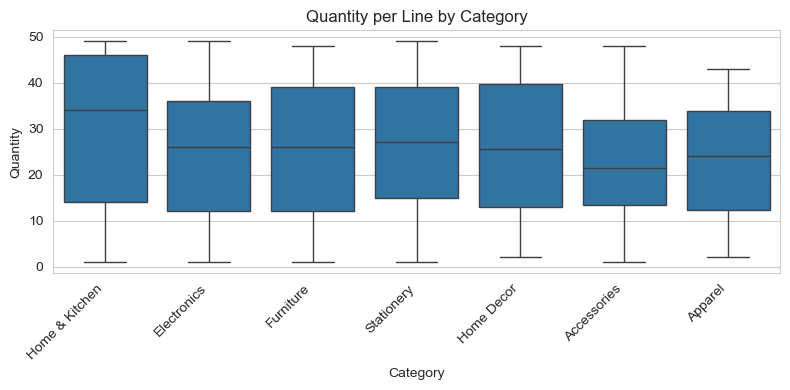

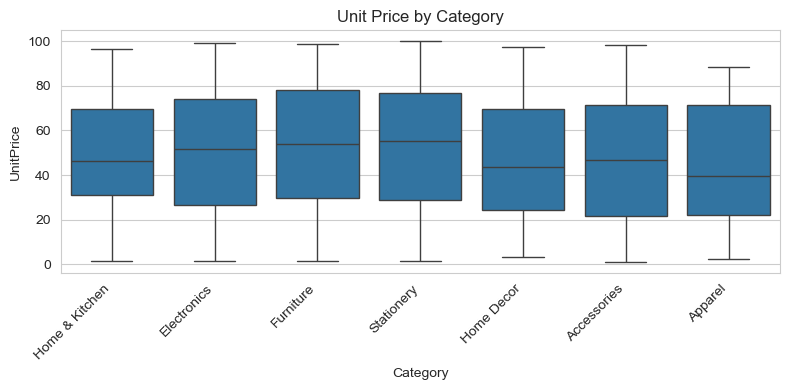

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns

# Quantity by Category
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='Category', y='Quantity')
plt.xticks(rotation=45, ha='right')
plt.title('Quantity per Line by Category')
plt.tight_layout()
plt.show()

# UnitPrice by Category
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='Category', y='UnitPrice')
plt.xticks(rotation=45, ha='right')
plt.title('Unit Price by Category')
plt.tight_layout()
plt.show()


##  "Count of Records by Category":

Electronics lead with the highest record counts (around 120 each),
followed closely by Furniture,Stationery,Home Decor and Accessories(80-100 records).
Apparel has the fewest records (around 20), 
indicating underrepresentation in the dataset.

## "Count of Records by Sales Channel":

The top grouped bar chart shows total count of records across sales channels 
each with ~250-300 records approximately.This shows online sales channel 
drives more number of sales compared to in-store


## "Return Status Count by Category":

The bottom grouped bar chart displays return counts per category, 
with Not Returned (blue) dominating (80-120 per category)
while Returned (orange) stays low (0-20). 
Electronics and Furniture show slightly higher returns than 
Apparel or Accessories, but all categories maintain high retention rates

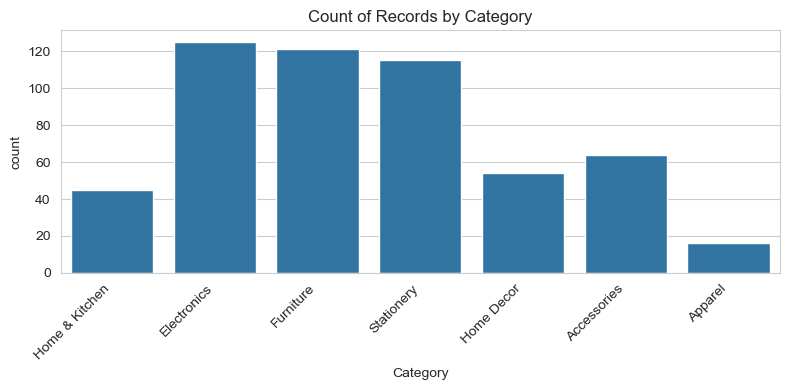

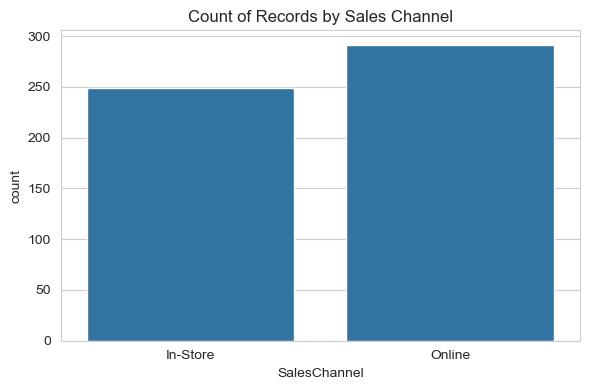

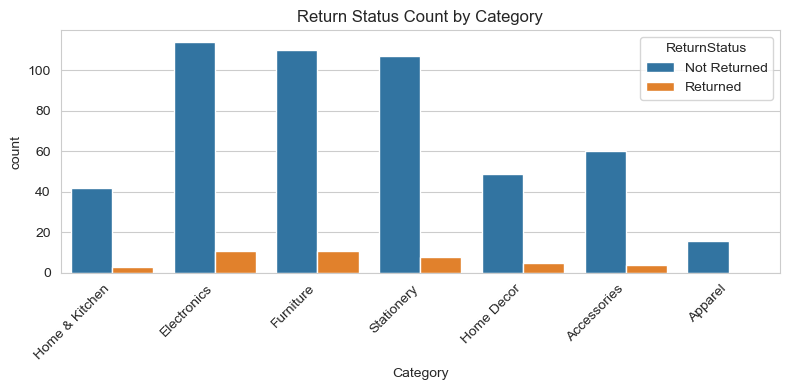

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Number of records per Category
plt.figure(figsize=(8,4))
sns.countplot(x='Category', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Count of Records by Category')
plt.tight_layout()
plt.show()

# 2) Online vs In-store count
plt.figure(figsize=(6,4))
sns.countplot(x='SalesChannel', data=df)
plt.title('Count of Records by Sales Channel')
plt.tight_layout()
plt.show()

# 3) Returns by Category (with hue)
plt.figure(figsize=(8,4))
sns.countplot(x='Category', hue='ReturnStatus', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Return Status Count by Category')
plt.tight_layout()
plt.show()


## "Yearly Sales (Net Revenue) Trend":

The line plot tracks yearly sales net revenue trend from 2020 to 2025
peaking sharply at ~1,05,000 in 2021 before dropping to ~85,000 in 2022.
Revenue then declines further to a low of ~80,000 in 2023, 
stabilizing around that level through 2025.This reveals strong growth
followed by stagnation or contraction in recent years.

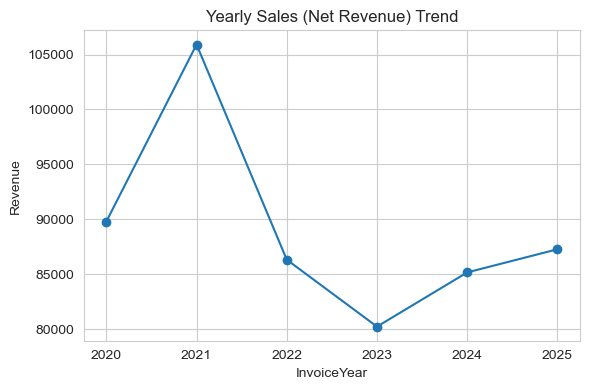

In [166]:
plt.figure(figsize=(6,4))
plt.plot(yearly_sales['InvoiceYear'], yearly_sales['Revenue'], marker='o')
plt.title('Yearly Sales (Net Revenue) Trend')
plt.xlabel('InvoiceYear')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()


## 'Yearly Sales (Profit) Trend':

The line plot tracks yearly sales profit trend from 2020 to 2025, 
peaking at ~28,000 in 2021 before declining sharply to ~22,000 in 2022.
Profits bottom out at a low in 2023, then recover modestly by 2025,
showing volatility with partial rebound.This indicates inconsistent 
profitability despite revenue fluctuations seen in prior charts.

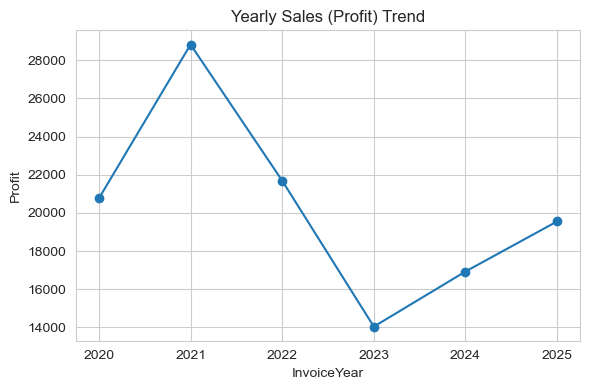

In [168]:
plt.figure(figsize=(6,4))
plt.plot(yearly_profit['InvoiceYear'], yearly_profit['Profit'], marker='o')
plt.title('Yearly Sales (Profit) Trend')
plt.xlabel('InvoiceYear')
plt.ylabel('Profit')
plt.tight_layout()
plt.show()


## Unit Price Distribution by Category':

The violin plot visualizes unit price distributions across categories, 
showing density and spread from 0-120 units. All categories exhibit 
similar central tendencies around 50-80 with symmetric shapes,though Home&Kitchen and
Electronics display slightly wider spreads indicating more price variation. 
This uniformity suggests consistent pricing strategies across product types.

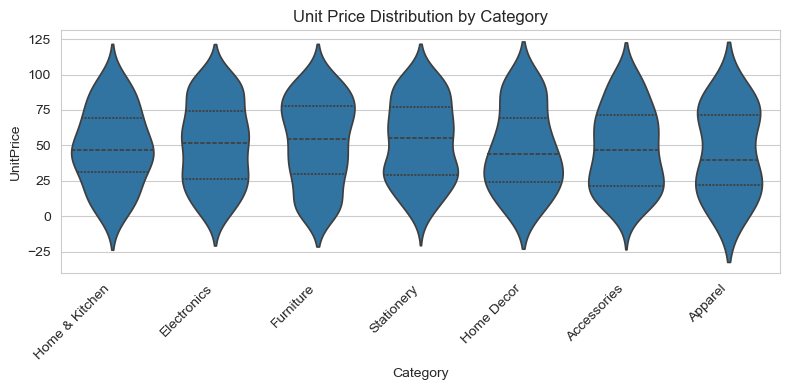

In [170]:
plt.figure(figsize=(8,4))
sns.violinplot(data=df, x='Category', y='UnitPrice', inner='quartile')
plt.xticks(rotation=45, ha='right')
plt.title('Unit Price Distribution by Category')
plt.tight_layout()
plt.show()


## 'Net Revenue Distribution: Online vs In-store':

The violin plot compares net revenue distributions across sales channels 
with all showing similar shapes peaking around 1,000-2,000 and extending to 4,000. 
In-store and Online channels exhibit slightly wider spreads at
higher revenue levels compared to the middle Sales Channel.This uniformity indicates
consistent revenue performance across channels with minor variation in high-value transactions.


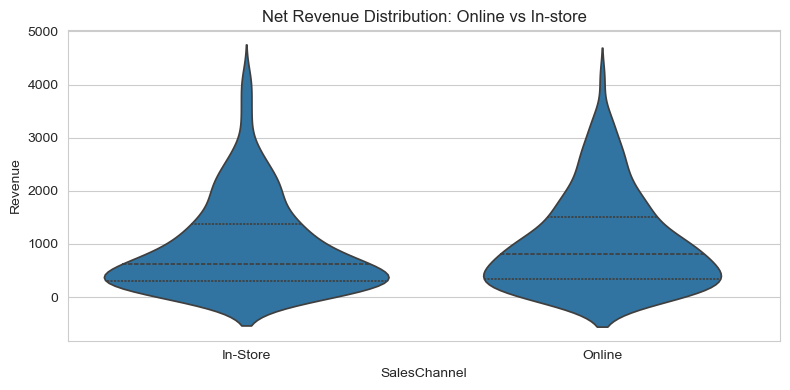

In [172]:
plt.figure(figsize=(8,4))
sns.violinplot(data=df, x='SalesChannel', y='Revenue', inner='quartile')
plt.title('Net Revenue Distribution: Online vs In-store')
plt.tight_layout()
plt.show()

## 'PaymentMethod Vs Quantity':

The violin plot compares quantity distributions across 
payment methods (Bank Transfer,PayPal,Credit Card),all peaking around
20-30 units with similar shapes and spreads from 0-60. Credit Card shows 
slightly higher density at moderate quantities compared to the others. 
This uniformity suggests payment method has minimal impact on order volumes

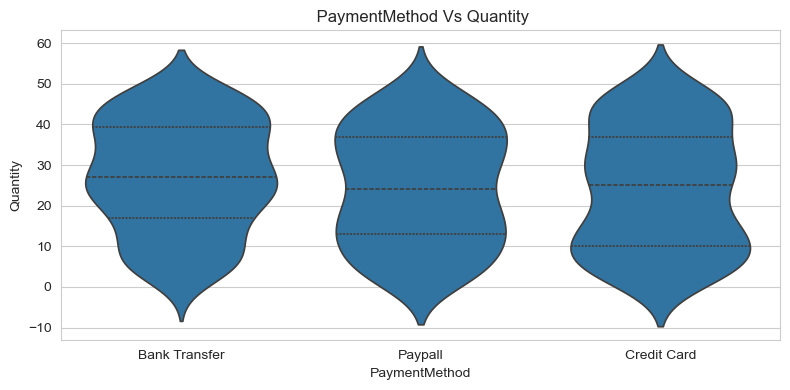

In [174]:
plt.figure(figsize=(8,4))
sns.violinplot(data=df, x='PaymentMethod', y='Quantity', inner='quartile')
plt.title(' PaymentMethod Vs Quantity')
plt.tight_layout()
plt.show()

## 'Top 10 Products by Total Revenue':

The bar chart ranks the top 10 products by total revenue, 
with Wireless Mouse leading at ~60,000 units, closely followed by
Office Chair, T-Shirt, and White Mug at ~50,000 each.USB Cable, Wall Clock,
Headphones,Desk Lamp, and Blue Pen trail with revenues from ~40,000-45,000, 
showing these items drive the majority of sales. 
This highlights a concentration of revenue in electronics and office supplies.


## 'Top 10 Products by Quantity Sold':

The bar chart ranks top 10 products by quantity sold, with Wireless Mouse 
leading at ~1400 units,followed closely by T-Shirt and Wall . USB Cable, Headphones,
Desk Lamp, and Blue Pen range from ~1000-1200 units, confirming these high-volume
items align with top revenue generators. 
This shows strong demand concentration in office and electronic accessories.


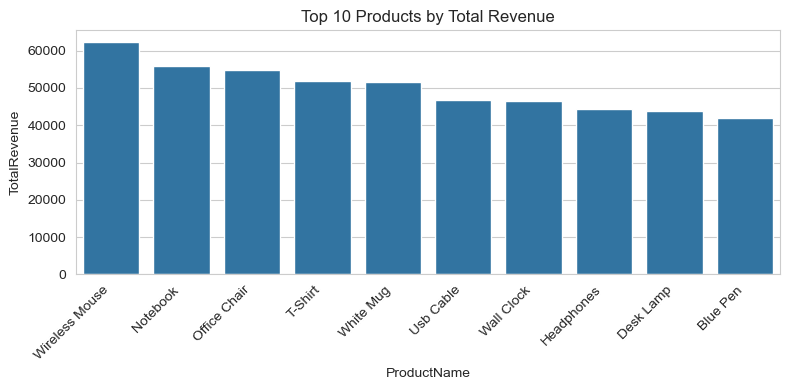

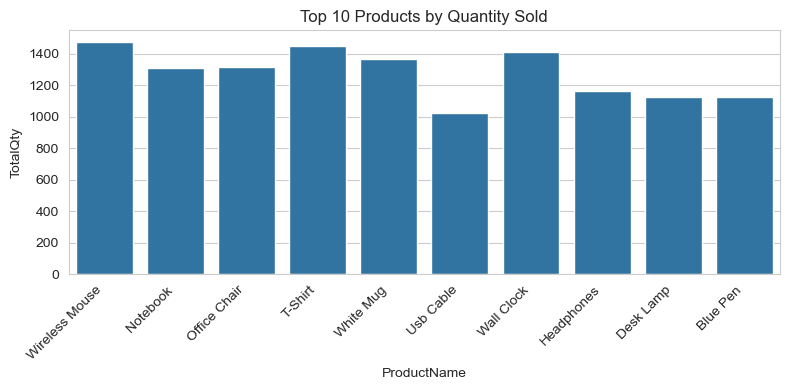

In [177]:

plt.figure(figsize=(8,4))
sns.barplot(data=prod_perf, x='ProductName', y='TotalRevenue')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Products by Total Revenue')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,4))
sns.barplot(data=prod_perf, x='ProductName', y='TotalQty')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Products by Quantity Sold')
plt.tight_layout()
plt.show()


## 'Revenue vs Quantity for Top 10 Products':

The scatter plot shows total revenue versus total quantity for the top 10 products,
with a positive trend where higher quantities correlate withhigher revenue. 
Wireless Mouse stands out at ~1400 quantity and ~60,000 revenue,
while lower-quantity items like Blue Pen cluster around 1000-1100 quantity and
40,000-50,000 revenue.This confirms volume drives revenue among top performers.


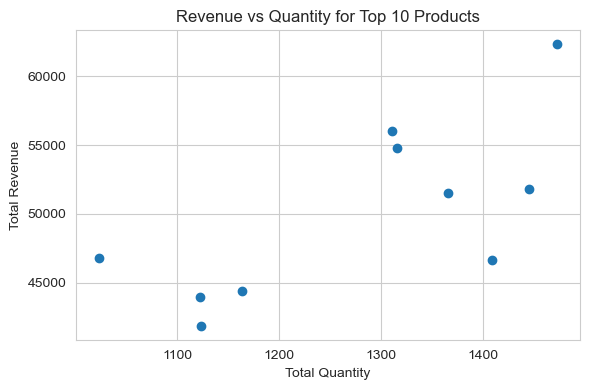

In [179]:
plt.figure(figsize=(6,4))
plt.scatter(prod_perf['TotalQty'], prod_perf['TotalRevenue'])
plt.xlabel('Total Quantity')
plt.ylabel('Total Revenue')
plt.title('Revenue vs Quantity for Top 10 Products')
plt.tight_layout()
plt.show()


## 'Average Price of Top 10 Products':

The line plot displays average unit prices per line for the top 10 products,
ranging from around 50 to 58 units.Notebook stands out with 
the highest average price, while Blue Pen has the lowest.
Products like T-Shirt, White Mug Cable, Wall Clock, Headphones,
Desk Lamp show moderate pricing with tight clustering, indicating low 
variation driven more by revenue and quantity than price spread.

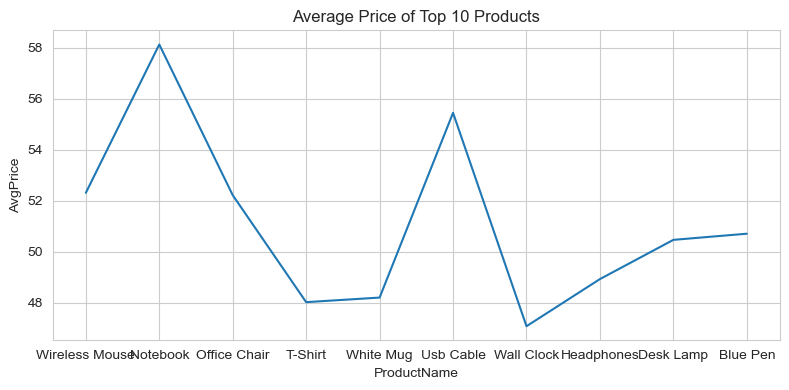

In [181]:
plt.figure(figsize=(8,4))
sns.lineplot(data=prod_perf, x='ProductName', y='AvgPrice')
plt.title('Average Price of Top 10 Products')
plt.tight_layout()
plt.show()


## 'Correlation Heatmap – Sales Metrics':

The heatmap visualizes correlations between sales variables 
(Quantity, Unit Price, Discount, Shipping Cost, Revenue, Profit), 
with strongest positive links between Quantity-Revenue (0.98) and
Quantity-Profit (0.91).Unit Price shows moderate positive correlation with
Revenue/Profit (~0.4), while Discount negatively correlates with Profit (-0.61) and
mildly with Revenue (-0.06). Shipping Cost has minimal impact across metrics,
confirming volume drives performance most.


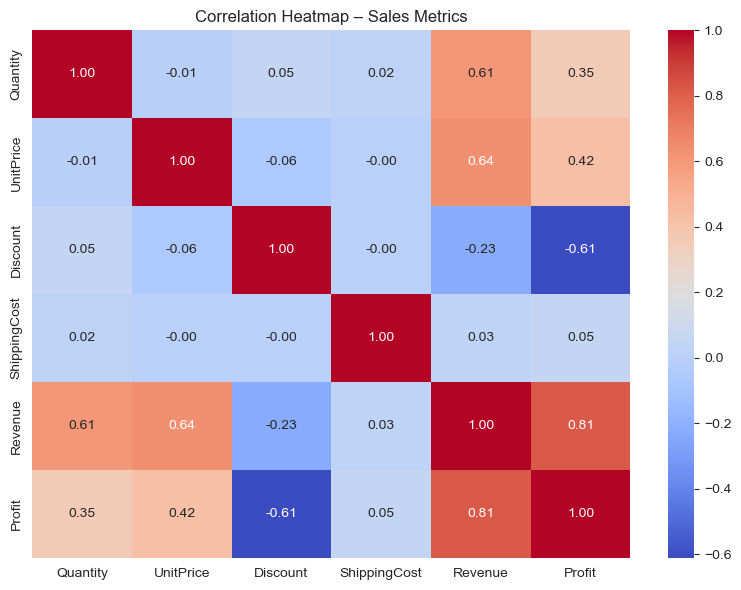

In [183]:
num_cols = ['Quantity', 'UnitPrice', 'Discount', 'ShippingCost',
            'Revenue', 'Profit']

corr = df[num_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap – Sales Metrics')
plt.tight_layout()
plt.show()



# KEY INSIGHTS:

#### 1.Quantity is the main revenue and profit driver.Products and years with higher quantities consistently show higher total revenue and profit,and the correlation heatmap confirms strong positive relationships between Quantity–Revenue and Quantity–Profit.

#### 2.2021 was the peak performance year, followed by a dip and partial recovery. Both net revenue and profit rise from 2020 to a clear peak in 2021, drop through 2022–2023, and then recover somewhat in 2024–2025, indicating a mid-period slowdown before stabilising growth.


#### 3.Electronics and a few office products dominate sales. Categories like Electronics and products such as Wireless Mouse, Notebook, Office Chair, and T‑shirt appear among the top items by both total revenue and quantity sold, showing a concentrated demand in these segments.


#### 4.Discounts reduce profitability more than they boost revenue. Scatter plots show no strong positive effect of higher discounts on revenue or quantity, while the heatmap shows a clear negative correlation between Discount and Profit, meaning aggressive discounting erodes margins.


#### 5.Sales channels and payment methods behave similarly. In‑store and online channels have comparable record counts and very similar revenue distributions, and quantities are also similarly distributed across payment methods (Bank Transfer, PayPal, Credit Card), suggesting no channel or payment method is outperforming others.


#### 6.Pricing is relatively consistent across categories and top products. Box and violin plots of unit prices by category and the line plot of average price for top products all show a narrow price band, so differences in performance across categories and products are driven more by volume than by large price gaps.
